Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Baca Gambar

In [18]:
img = cv2.imread('gambar_nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Range Warna

In [4]:
# Blue
lower_blue = np.array([20, 10, 10])
upper_blue = np.array([124, 175, 175])
lower_blue_dark = np.array([100, 50, 50])
upper_blue_dark = np.array([140, 255, 255])

# Red
lower_red = np.array([0, 5, 5])
upper_red = np.array([5, 175, 175])
lower_red_dark = np.array([0, 50, 50])
upper_red_dark = np.array([10, 255, 255])
lower_red_alt_dark = np.array([170, 50, 50])
upper_red_alt_dark = np.array([180, 255, 255])

# Green
lower_green = np.array([20, 10, 10])
upper_green = np.array([30, 175, 175])
lower_green_dark = np.array([60, 50, 50])
upper_green_dark = np.array([80, 255, 255])

# None
lower_none = np.array([0, 0,0])
upper_none = np.array([0, 0,0])

Deteksi Warna

In [5]:
mask_blue = cv2.inRange(hsv_img, lower_blue, upper_blue) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark) + cv2.inRange(hsv_img, lower_green_dark, upper_green_dark)
mask_red = cv2.inRange(hsv_img, lower_green_dark, upper_green_dark) +  cv2.inRange(hsv_img, lower_blue, upper_blue) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red, upper_red)
mask_green = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark)+ cv2.inRange(hsv_img, lower_green_dark, upper_green_dark)
mask_none = cv2.inRange(img_rgb, lower_none, upper_none)

mask_blue2 = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark)
mask_red_blue = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark)
mask_red_green_blue = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark) + cv2.inRange(hsv_img, lower_green_dark, upper_green_dark) +cv2.inRange(hsv_img, lower_blue, upper_blue)

# Invert coler
mask_blue_inv = cv2.bitwise_not(mask_blue)
mask_red_inv = cv2.bitwise_not(mask_red)
mask_green_inv = cv2.bitwise_not(mask_green)

Menampilkan Gambar dan Hasil Deteksi Warna

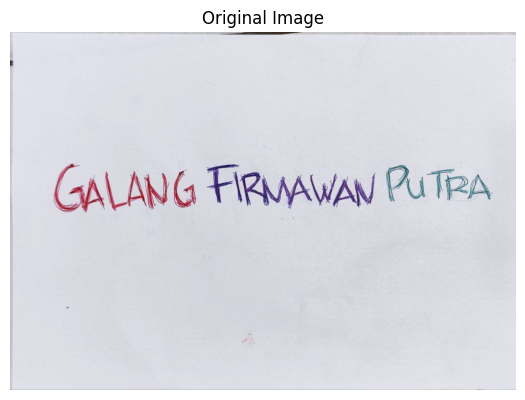

In [19]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

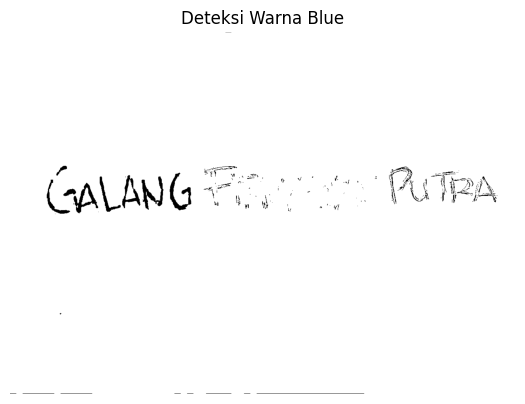

In [20]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 2)
plt.imshow(mask_blue_inv, cmap='gray')
plt.title('Deteksi Warna Blue')
plt.axis('off')
plt.show()

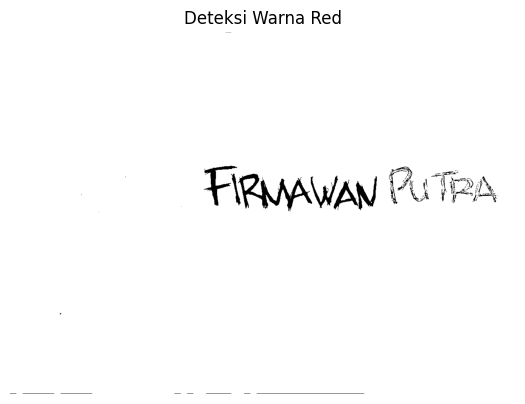

In [21]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 3)
plt.imshow(mask_red_inv, cmap='gray')
plt.title('Deteksi Warna Red')
plt.axis('off')
plt.show()

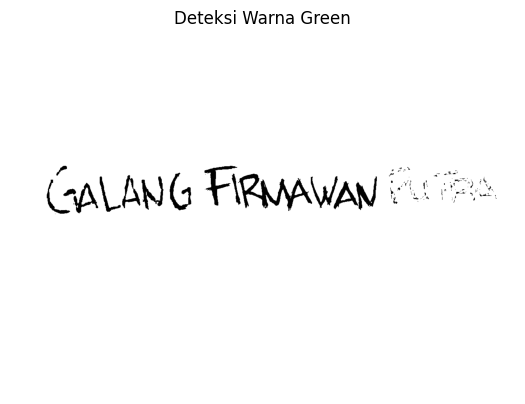

In [22]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 4)
plt.imshow(mask_green_inv, cmap='gray')
plt.title('Deteksi Warna Green')
plt.axis('off')
plt.show()

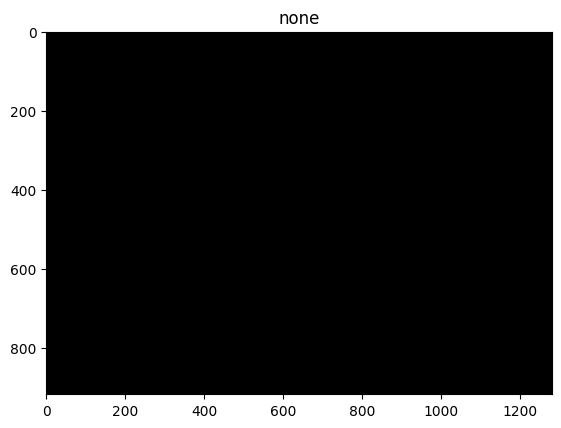

In [23]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(mask_none, cmap='gray')
plt.title('none')
plt.show()

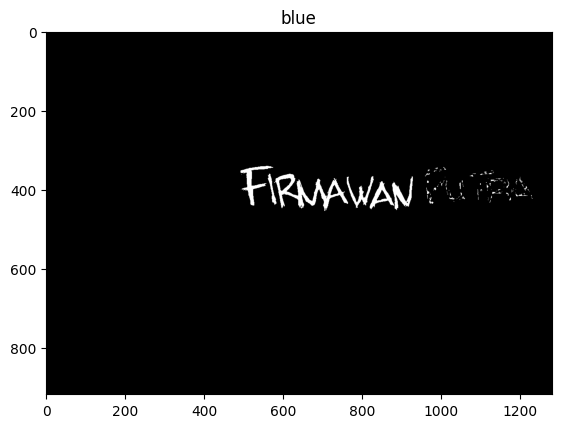

In [24]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(mask_blue2, cmap='gray')
plt.title('blue')
plt.show()

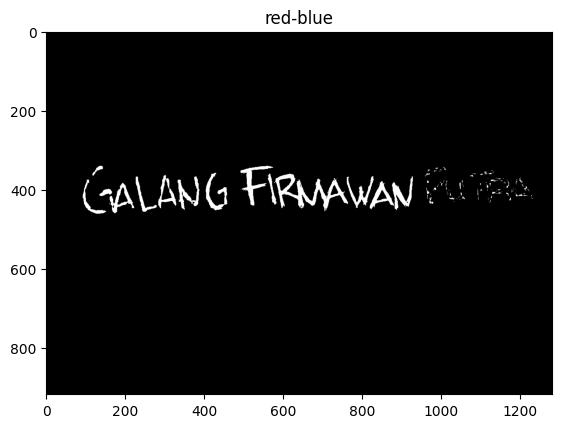

In [25]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(mask_red_blue, cmap='gray')
plt.title('red-blue')
plt.show()

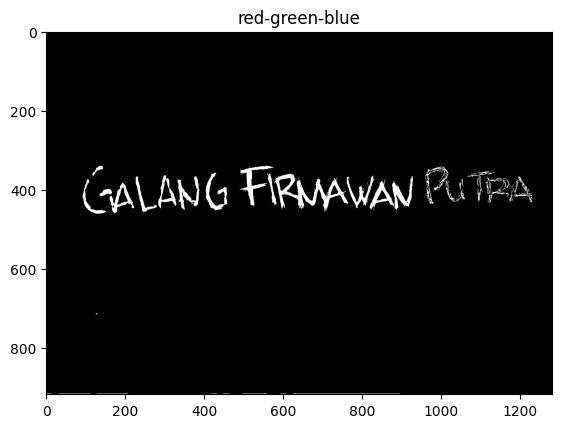

In [26]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(mask_red_green_blue, cmap='gray')
plt.title('red-green-blue')
plt.show()

In [27]:
# Saluran Hue
hue_channel = hsv_img[:,:,0]

# Temukan ambang batas untuk setiap saluran warna
_, blue_thresh = cv2.threshold(hue_channel, 100, 130, cv2.THRESH_BINARY)
_, red1_thresh = cv2.threshold(hue_channel, 0, 10, cv2.THRESH_BINARY)
_, red2_thresh = cv2.threshold(hue_channel, 170, 180, cv2.THRESH_BINARY)
_, green_thresh = cv2.threshold(hue_channel, 40, 80, cv2.THRESH_BINARY)

# Gabungkan semua ambang batas dan hapus duplikat
all_thresholds = np.unique(np.concatenate((blue_thresh, red1_thresh, red2_thresh, green_thresh)))

# Urutkan ambang batas dari terkecil hingga terbesar
sorted_thresholds = np.sort(all_thresholds)

print("Ambang Batas Terkecil hingga Terbesar:")
print(sorted_thresholds)


Ambang Batas Terkecil hingga Terbesar:
[  0  10  80 130 180]


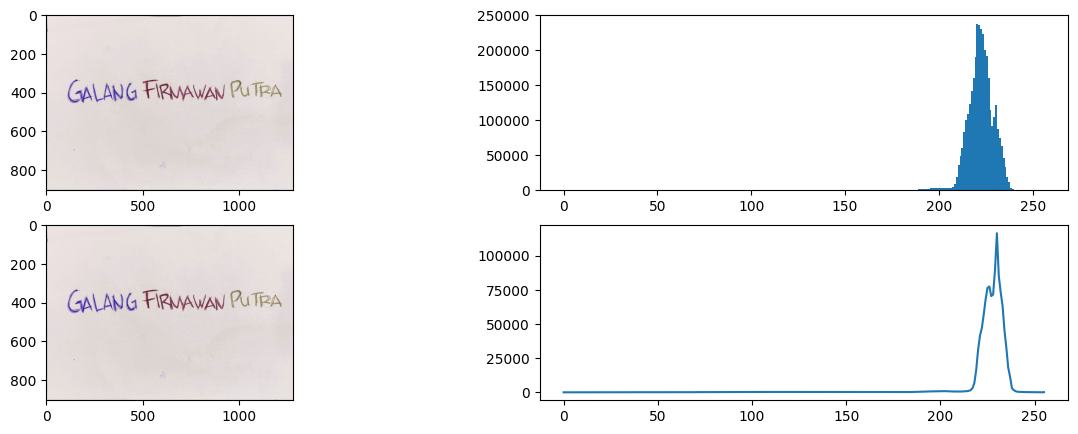

In [28]:
# Cara 1 menggunakan Hist()
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])

# Cara 2 menggunakan Calchist()
hist = cv2.calcHist([img],[0],None,[256],[0,256])
axs[1,0].imshow(img)
axs[1,1].plot(hist)
plt.show()